<a href="https://colab.research.google.com/github/johnrua17/I.B-Lab/blob/main/I_B_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt


### Definición y muestreo de la señal

Niveles de cuantización (L): 16
Bits necesarios por muestra: 4


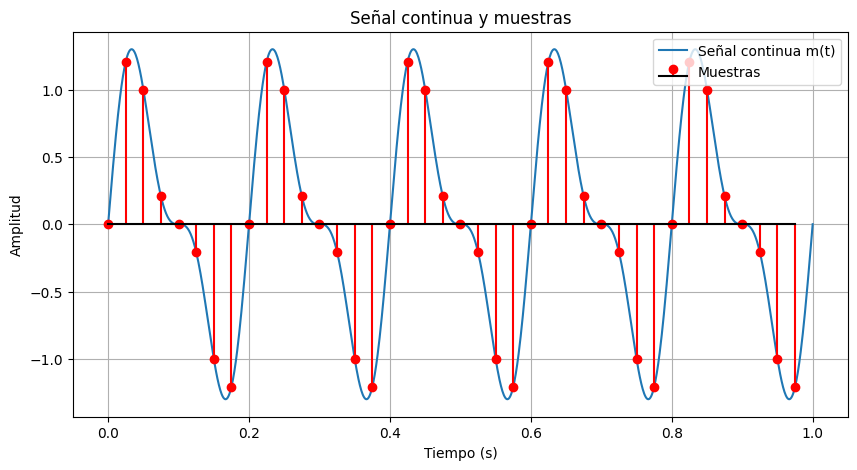

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal m(t): suma de sinusoides
def generate_signal(t, f1, f2):
    return np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Parámetros de la señal
t_max = 1  # Duración de la señal en segundos
fs_cont = 1000  # Frecuencia de muestreo para señal continua (para graficar)
f1, f2 = 5, 10  # Frecuencias de las sinusoides

# Generación de la señal continua
t = np.linspace(0, t_max, int(t_max * fs_cont)) # Vector de tiempo
m_t = generate_signal(t, f1, f2) # Señal m(t)

# Muestreo según el teorema del muestreo
fs = 40  # Frecuencia de muestreo (fs >= 2 * f_max)
ts = 1 / fs  # Periodo de muestreo
n = np.arange(0, t_max, ts) # Muestras en el tiempo
m_samples = generate_signal(n, f1, f2) # Muestras de la señal

# Definir los niveles de cuantización y calcular los bits necesarios
L = 16  # Número de niveles de cuantización
bits_per_sample = int(np.ceil(np.log2(L)))  # Cálculo de bits

print(f"Niveles de cuantización (L): {L}")
print(f"Bits necesarios por muestra: {bits_per_sample}")

# Gráfica de la señal original y muestras
plt.figure(figsize=(10, 5))
plt.plot(t, m_t, label="Señal continua m(t)")
plt.stem(n, m_samples, linefmt="r", markerfmt="ro", basefmt="k", label="Muestras")
plt.title("Señal continua y muestras")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

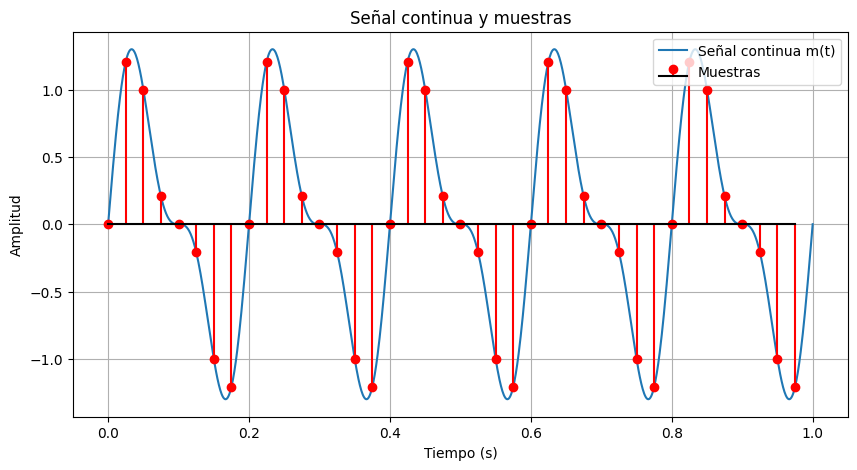

In [17]:
# Definir la señal m(t): suma de sinusoides
def generate_signal(t, f1, f2):
    return np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Parámetros de la señal
t_max = 1  # Duración de la señal en segundos
fs_cont = 1000  # Frecuencia de muestreo para señal continua (para graficar)
f1, f2 = 5, 10  # Frecuencias de las sinusoides

# Generación de la señal continua
t = np.linspace(0, t_max, int(t_max * fs_cont))
m_t = generate_signal(t, f1, f2)

# Muestreo según el teorema del muestreo
fs = 40  # Frecuencia de muestreo (fs >= 2 * f_max)
ts = 1 / fs  # Periodo de muestreo
n = np.arange(0, t_max, ts) # Muestras en el tiempo
m_samples = generate_signal(n, f1, f2) # Muestras de la señal

# Gráfica de la señal original y muestras
plt.figure(figsize=(10, 5))
plt.plot(t, m_t, label="Señal continua m(t)")
plt.stem(n, m_samples, linefmt="r", markerfmt="ro", basefmt="k", label="Muestras")
plt.title("Señal continua y muestras")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

### Cuantización uniforme

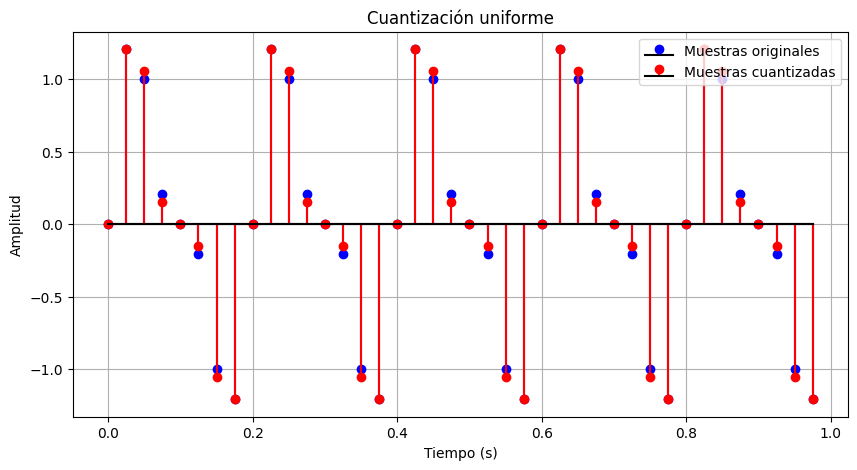

In [18]:
# Determinar el rango dinámico de la señal
L = 16  # Número de niveles de cuantización
min_val, max_val = min(m_samples), max(m_samples) # Mínimo y máximo de las muestras
step_size = (max_val - min_val) / L # Tamaño del paso de cuantización

# Cuantización de las muestras
quantized_samples = np.round((m_samples - min_val) / step_size) * step_size + min_val # Cuantización

# Gráfica de la señal cuantizada
plt.figure(figsize=(10, 5))
plt.stem(n, m_samples, linefmt="b", markerfmt="bo", basefmt="k", label="Muestras originales")
plt.stem(n, quantized_samples, linefmt="r", markerfmt="ro", basefmt="k", label="Muestras cuantizadas")
plt.title("Cuantización uniforme")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

### Codificación

In [23]:
# Convertir los niveles cuantizados en palabras binarias
bits_per_sample = int(np.ceil(np.log2(L)))  # Número de bits por muestra
binary_code = [
    np.binary_repr(max(0, min(int(np.round((x - min_val) / step_size)), L - 1)), bits_per_sample)
    for x in quantized_samples
]

# Mostrar los códigos binarios generados
print("Códigos binarios de las muestras cuantizadas:")
for i, code in enumerate(binary_code):
    print(f"Muestra {i}: {quantized_samples[i]:.2f} -> {code}")

Códigos binarios de las muestras cuantizadas:
Muestra 0: -0.00 -> 1000
Muestra 1: 1.21 -> 1111
Muestra 2: 1.06 -> 1111
Muestra 3: 0.15 -> 1001
Muestra 4: -0.00 -> 1000
Muestra 5: -0.15 -> 0111
Muestra 6: -1.06 -> 0001
Muestra 7: -1.21 -> 0000
Muestra 8: -0.00 -> 1000
Muestra 9: 1.21 -> 1111
Muestra 10: 1.06 -> 1111
Muestra 11: 0.15 -> 1001
Muestra 12: -0.00 -> 1000
Muestra 13: -0.15 -> 0111
Muestra 14: -1.06 -> 0001
Muestra 15: -1.21 -> 0000
Muestra 16: -0.00 -> 1000
Muestra 17: 1.21 -> 1111
Muestra 18: 1.06 -> 1111
Muestra 19: 0.15 -> 1001
Muestra 20: -0.00 -> 1000
Muestra 21: -0.15 -> 0111
Muestra 22: -1.06 -> 0001
Muestra 23: -1.21 -> 0000
Muestra 24: -0.00 -> 1000
Muestra 25: 1.21 -> 1111
Muestra 26: 1.06 -> 1111
Muestra 27: 0.15 -> 1001
Muestra 28: -0.00 -> 1000
Muestra 29: -0.15 -> 0111
Muestra 30: -1.06 -> 0001
Muestra 31: -1.21 -> 0000
Muestra 32: -0.00 -> 1000
Muestra 33: 1.21 -> 1111
Muestra 34: 1.06 -> 1111
Muestra 35: 0.15 -> 1001
Muestra 36: -0.00 -> 1000
Muestra 37: -0.15

1. Unipolar NRZ


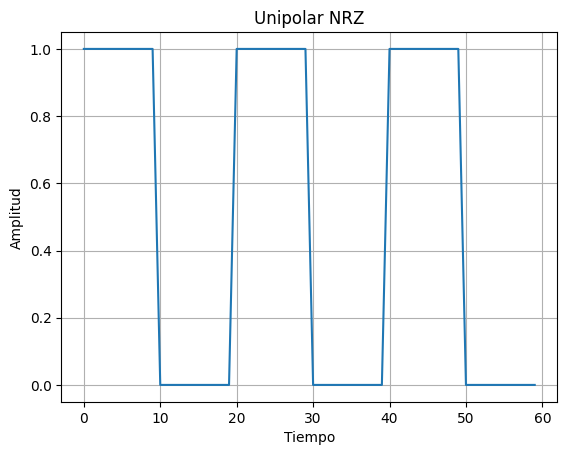

In [8]:
# Unipolar NRZ
def unipolar_nrz(binary_stream, ts):
    """
    Convierte una secuencia binaria en una señal Unipolar NRZ.

    - '1' se representa con un nivel alto (1).
    - '0' se representa con un nivel bajo (0).
    """
    signal = []
    for bit in binary_stream:
        signal.extend([1 if bit == '1' else 0] * int(ts * 1000))
    return signal

# Ejemplo de uso
binary_stream = '101010'  # Stream binario de ejemplo
ts = 0.01                 # Duración de cada bit
unipolar_nrz_signal = unipolar_nrz(binary_stream, ts)

# Gráfico
plt.figure()
plt.plot(unipolar_nrz_signal[:100])  # Mostrar primeros 100 puntos
plt.title("Unipolar NRZ")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()




En este formato, los 1 se representan con un nivel de señal alto (amplitud = 1), y los 0 con un nivel bajo (amplitud = 0).

Es un formato básico y fácil de interpretar.

El código toma un flujo binario y genera una señal digital correspondiente.

2. Bipolar NRZ

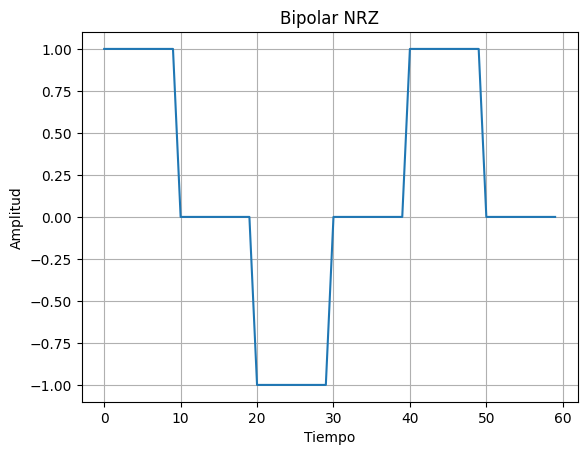

In [9]:
# Bipolar NRZ
def bipolar_nrz(binary_stream, ts):
    """
    Convierte una secuencia binaria en una señal Bipolar NRZ.

    - '1' alterna entre niveles alto (+1) y bajo (-1).
    - '0' se representa con un nivel neutro (0).
    """
    signal = []
    polarity = 1
    for bit in binary_stream:
        if bit == '1':
            signal.extend([polarity] * int(ts * 1000))
            polarity *= -1  # Alternar polaridad
        else:
            signal.extend([0] * int(ts * 1000))
    return signal

# Ejemplo de uso
bipolar_nrz_signal = bipolar_nrz(binary_stream, ts)

# Gráfico
plt.figure()
plt.plot(bipolar_nrz_signal[:100])  # Mostrar primeros 100 puntos
plt.title("Bipolar NRZ")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


Los 1 alternan entre amplitudes de +1 y -1, lo que ayuda a reducir el componente de DC en la señal.

Los 0 se mantienen en nivel 0.

Es útil para evitar problemas de sincronización en transmisiones largas.

3. Unipolar RZ

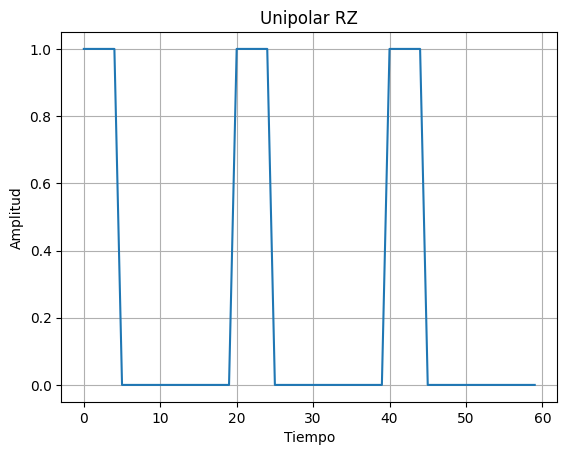

In [10]:
# Unipolar RZ
def unipolar_rz(binary_stream, ts):
    """
    Convierte una secuencia binaria en una señal Unipolar RZ.

    - '1' se representa con un pulso alto en la mitad del intervalo.
    - '0' se representa con un nivel bajo en todo el intervalo.
    """
    signal = []
    for bit in binary_stream:
        if bit == '1':
            signal.extend([1] * int(ts * 500) + [0] * int(ts * 500))
        else:
            signal.extend([0] * int(ts * 1000))
    return signal

# Ejemplo de uso
unipolar_rz_signal = unipolar_rz(binary_stream, ts)

# Gráfico
plt.figure()
plt.plot(unipolar_rz_signal[:100])  # Mostrar primeros 100 puntos
plt.title("Unipolar RZ")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


En este formato, un 1 tiene un pulso que ocupa la mitad del intervalo, y un 0 permanece en 0 durante todo el intervalo.

Es más eficiente que Unipolar NRZ para sincronización.


4. Bipolar RZ

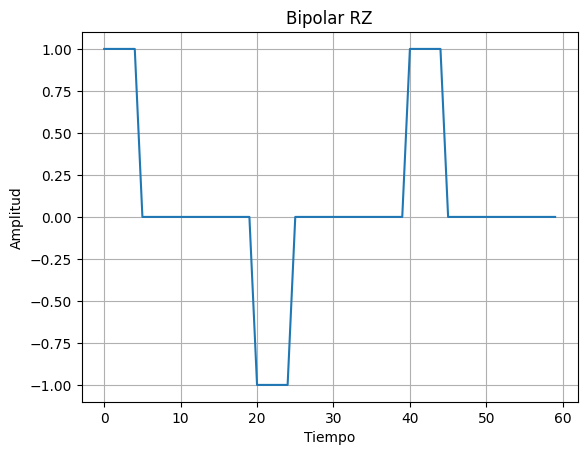

In [11]:
# Bipolar RZ
def bipolar_rz(binary_stream, ts):
    """
    Convierte una secuencia binaria en una señal Bipolar RZ.

    - '1' alterna entre pulsos alto (+1) y bajo (-1) en la mitad del intervalo.
    - '0' se representa con un nivel neutro (0) en todo el intervalo.
    """
    signal = []
    polarity = 1
    for bit in binary_stream:
        if bit == '1':
            signal.extend([polarity] * int(ts * 500) + [0] * int(ts * 500))
            polarity *= -1
        else:
            signal.extend([0] * int(ts * 1000))
    return signal

# Ejemplo de uso
bipolar_rz_signal = bipolar_rz(binary_stream, ts)

# Gráfico
plt.figure()
plt.plot(bipolar_rz_signal[:100])  # Mostrar primeros 100 puntos
plt.title("Bipolar RZ")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


Combina las ventajas de Bipolar NRZ y Unipolar RZ al alternar la polaridad de los pulsos para 1.

Los 0 se representan con un nivel neutro (0).

5. AMI RZ

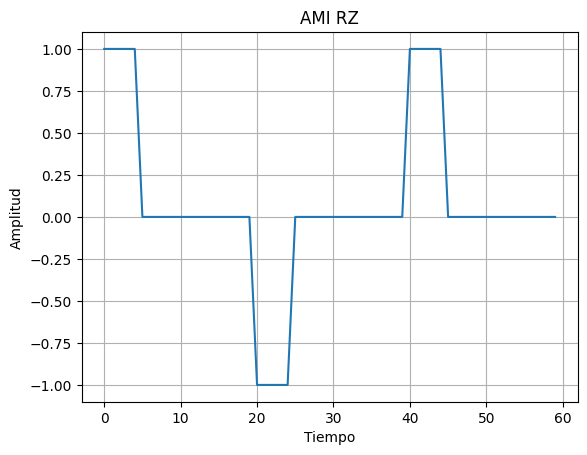

In [12]:
# AMI RZ
def ami_rz(binary_stream, ts):
    """
    Convierte una secuencia binaria en una señal AMI RZ.

    - '1' alterna entre pulsos alto (+1) y bajo (-1) en la mitad del intervalo.
    - '0' se representa con un nivel neutro (0) en todo el intervalo.
    """
    signal = []
    polarity = 1
    for bit in binary_stream:
        if bit == '1':
            signal.extend([polarity] * int(ts * 500) + [0] * int(ts * 500))
            polarity *= -1
        else:
            signal.extend([0] * int(ts * 1000))
    return signal

# Ejemplo de uso
ami_rz_signal = ami_rz(binary_stream, ts)

# Gráfico
plt.figure()
plt.plot(ami_rz_signal[:100])  # Mostrar primeros 100 puntos
plt.title("AMI RZ")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


Es similar a Bipolar RZ, pero sigue la regla AMI (Alternate Mark Inversion), alternando la polaridad solo para 1.

Es más eficiente para evitar pérdida de sincronización.

6. Manchester

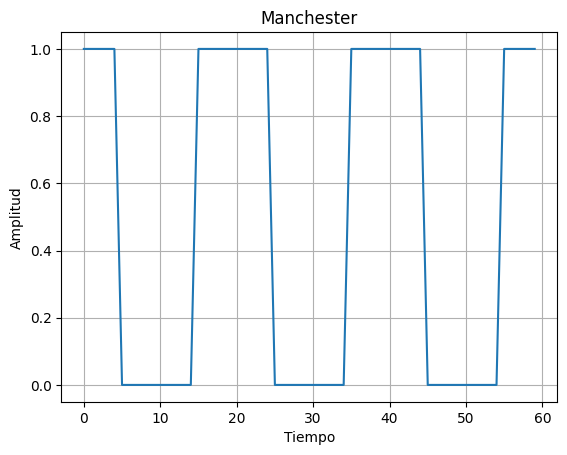

In [13]:
# Manchester
def manchester(binary_stream, ts):
    """
    Convierte una secuencia binaria en una señal Manchester.

    - '1' se representa como una transición de alto a bajo.
    - '0' se representa como una transición de bajo a alto.
    """
    signal = []
    for bit in binary_stream:
        if bit == '1':
            signal.extend([1] * int(ts * 500) + [0] * int(ts * 500))
        else:
            signal.extend([0] * int(ts * 500) + [1] * int(ts * 500))
    return signal

# Ejemplo de uso
manchester_signal = manchester(binary_stream, ts)

# Gráfico
plt.figure()
plt.plot(manchester_signal[:100])  # Mostrar primeros 100 puntos
plt.title("Manchester")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


Manchester utiliza transiciones dentro de cada intervalo para codificar la información.

Es robusto contra pérdida de sincronización.

Reconstrucción de la Señal Cuantizada

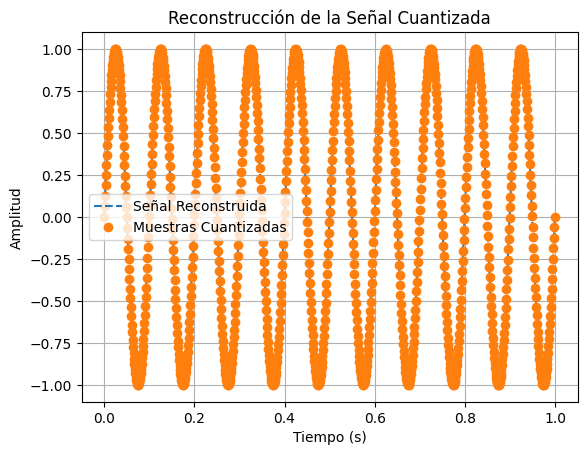

In [14]:
# Reconstrucción de la señal cuantizada
import numpy as np
import matplotlib.pyplot as plt

def reconstruct_signal(quantized_samples, fs, t):
    """
    Reconstruye la señal a partir de los valores cuantizados usando interpolación lineal.

    Parameters:
    - quantized_samples: Lista o array con los valores cuantizados.
    - fs: Frecuencia de muestreo (Hz).
    - t: Vector de tiempo original para reconstrucción.

    Returns:
    - reconstructed_signal: Señal reconstruida interpolando los puntos cuantizados.
    """
    n = np.arange(len(quantized_samples)) / fs  # Tiempo de los puntos de muestra
    reconstructed_signal = np.interp(t, n, quantized_samples)  # Interpolación lineal
    return reconstructed_signal

# Ejemplo de entrada
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 1, 10000)  # Tiempo continuo para reconstrucción
quantized_samples = np.sin(2 * np.pi * 10 * np.linspace(0, 1, fs))  # Señal de ejemplo

# Reconstruir la señal
reconstructed_signal = reconstruct_signal(quantized_samples, fs, t)

# Gráfico
plt.figure()
plt.plot(t, reconstructed_signal, label="Señal Reconstruida", linestyle='dashed')
plt.plot(np.arange(len(quantized_samples)) / fs, quantized_samples, 'o', label="Muestras Cuantizadas")
plt.title("Reconstrucción de la Señal Cuantizada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()
